In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [2]:
# PREPARING TRAINING DATA

df = pd.read_csv('SWFL_Properties_Cleaned.csv')

# Convert string values to int
numeric_cols = ['price', 'year', 'baths', 'sqft', 'Number of Ammenities',
                'Living Area', 'Total Area', 'Total Floors',
                'Garage Spaces', 'Bedrooms']

for col in numeric_cols:
  df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True).astype(int)

# Convert 'Community Type' to boolean
df['Community Type'] = [1 if i=="Gated" else 0 for i in df['Community Type']]

df = df.drop(columns=['sqft'])

# Feature Engineering
today = datetime.date.today()
year = today.year

df['Base Rooms'] = df['Bedrooms'] + df['baths']
df['Living Area Ratio'] = df['Living Area']/df['Total Area']
df['Living Area Squared'] = df['Living Area']**2
df['House Age'] = year - df['year']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1486 non-null   int64  
 1   price                 1486 non-null   int64  
 2   year                  1486 non-null   int64  
 3   baths                 1486 non-null   int64  
 4   Community Type        1486 non-null   int64  
 5   Number of Ammenities  1486 non-null   int64  
 6   Living Area           1486 non-null   int64  
 7   Total Area            1486 non-null   int64  
 8   Total Floors          1486 non-null   int64  
 9   Garage Spaces         1486 non-null   int64  
 10  Bedrooms              1486 non-null   int64  
 11  Base Rooms            1486 non-null   int64  
 12  Living Area Ratio     1486 non-null   float64
 13  Living Area Squared   1486 non-null   int64  
 14  House Age             1486 non-null   int64  
dtypes: float64(1), int64(

<ipython-input-3-a9076778ba58>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=X[feature], y=y, ax=axes[i], jitter=True, palette="coolwarm", alpha=0.7)


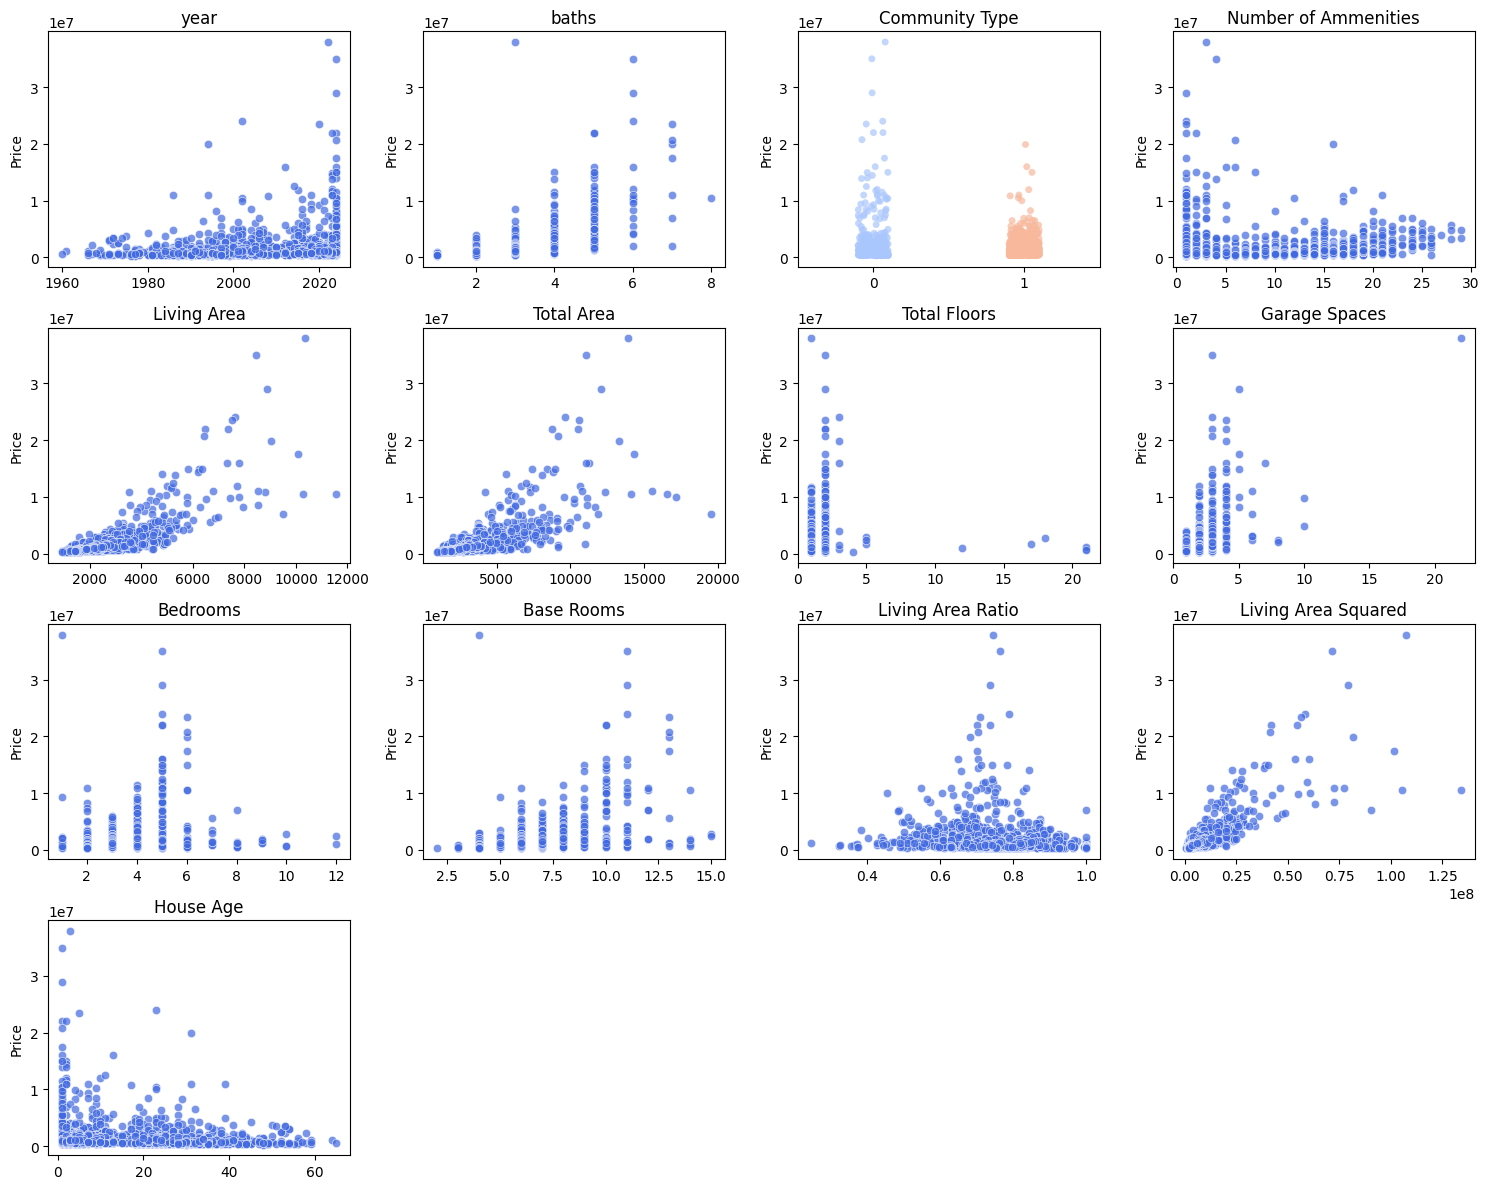

In [3]:
X = df.drop(columns=['ID', 'price'])
y = df['price']

# Identify feature types
binary_features = [col for col in X.columns if X[col].nunique() == 2]
# categorical_features = [col for col in X.columns if X[col].dtype == 'int64' and X[col].nunique() > 2]
continuous_features = [col for col in X.columns] # if X[col].dtype == 'float64'

# Set up the grid size
num_features = X.shape[1]
cols = 4  # Number of columns in the grid
rows = int(np.ceil(num_features / cols))  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each feature against price
for i, feature in enumerate(X.columns):
    if feature in binary_features:
        # Use a strip plot with jitter for binary features
        sns.stripplot(x=X[feature], y=y, ax=axes[i], jitter=True, palette="coolwarm", alpha=0.7)
    # elif feature in categorical_features:
        # sns.boxplot(x=X[feature].astype(str), y=y, ax=axes[i], hue=X[feature].astype(str), palette="coolwarm", legend=False)
    else:
        # Use a scatter plot for continuous features
        sns.scatterplot(x=X[feature], y=y, ax=axes[i], color='royalblue', alpha=0.7)

    axes[i].set_title(feature)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Price")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

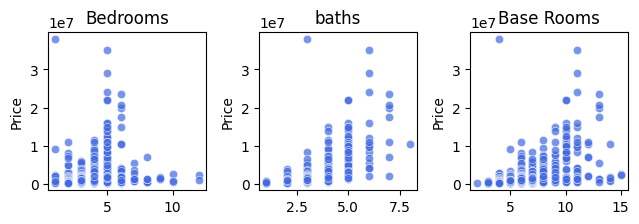

In [6]:
X_x = X[['Bedrooms', 'baths', 'Base Rooms']]

fig, axes = plt.subplots(1, 3, figsize=(6.5, 2.5))
axes = axes.flatten()

for i, feature in enumerate(X_x.columns):
  sns.scatterplot(x=X[feature], y=y, ax=axes[i], color='royalblue', alpha=0.7)

  axes[i].set_title(feature)
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Price")

plt.tight_layout()
plt.show()

In [7]:
# RANDOM FOREST MODEL

X = df.drop(columns=['ID', 'price'])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("R² Score:", r2)

Mean Absolute Error (MAE): 462929.01858732826
Root Mean Squared Error (RMSE): 975411.5038674226
Mean Squared Logarithmic Error (MSLE): 0.1123972531293131
R² Score: 0.8555999747408585


In [8]:
## PREPARING TESTING DATA

df = pd.read_csv('Housing.csv')

# Convert string values to int
numeric_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                'prefarea']

for col in numeric_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Transforming data
df['year'] = 2022
df['baths'] = df['bathrooms']
df['Community Type'] = df['prefarea']
df['Number of Ammenities'] = df['mainroad'] + df['basement'] + df['hotwaterheating'] + df['airconditioning'] + df['furnishingstatus']
df['Living Area'] = df['area']*0.768
df['Total Area'] = df['area']
df['Total Floors'] = df['stories']
df['Garage Spaces'] = df['parking']
df['Bedrooms'] = df['bedrooms']
df['Base Rooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']
df['Living Area Ratio'] = df['Living Area'] / df['Total Area']
df['Living Area Squared'] = df['Living Area']**2
df['House Age'] = 2025 - df['year']

# New dataframe
df_test = df.drop(['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], axis=1)
df_test.head()

,price,year,baths,Community Type,Number of Ammenities,Living Area,Total Area,Total Floors,Garage Spaces,Bedrooms,Base Rooms,Living Area Ratio,Living Area Squared,House Age
0,13300000,2022,2,1,4,5698.56,7420,3,2,4,6,0.768,3.247359e+07,3
1,12250000,2022,4,0,4,6881.28,8960,4,3,4,8,0.768,4.735201e+07,3
2,12250000,2022,2,1,3,7649.28,9960,2,2,3,5,0.768,5.851148e+07,3
3,12215000,2022,2,1,5,5760.00,7500,2,3,4,6,0.768,3.317760e+07,3
4,11410000,2022,1,0,5,5698.56,7420,2,2,4,6,0.768,3.247359e+07,3


In [9]:
# TESTING MODEL ON NEW DATA
X_Test = df_test.drop(columns=['price'])
Y_Test = df_test['price']
Y_pred = rf.predict(X_Test)

mae = mean_absolute_error(Y_Test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_Test, Y_pred))
msle = mean_squared_log_error(Y_Test, Y_pred)
r2 = r2_score(Y_Test, Y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("R² Score:", r2)

Mean Absolute Error (MAE): 3803147.47780592
Root Mean Squared Error (RMSE): 6406642.120138561
Mean Squared Logarithmic Error (MSLE): 0.668707277236894
R² Score: -10.753606516677829


In [10]:
# CREATING NEW MODEL WITH SAME STRATEGY
X = df_test.drop(columns=['price'])
y = df_test['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1017307.3840978594
Root Mean Squared Error (RMSE): 1423673.7876088119
Mean Squared Logarithmic Error (MSLE): 0.07098187006506351
R² Score: 0.599007046151126


In [12]:
# COMBINING DATASETS
df = df
df_new = pd.concat([df, df_test], axis=0)

X = df_new.drop(columns=['price'])
y = df_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("R² Score:", r2)

Mean Absolute Error (MAE): 567860.5405963303
Root Mean Squared Error (RMSE): 830351.529755624
Mean Squared Logarithmic Error (MSLE): 0.026810695814104366
R² Score: 0.7994369437279396
